# Tensorflow分类任务:

## 读取Mnist数据集
- 会自动进行下载

In [50]:
%matplotlib inline

In [51]:
from pathlib import Path
import requests

DATA_PATH = Path("data")
PATH = DATA_PATH / "mnist"

PATH.mkdir(parents=True, exist_ok=True)

URL = "http://deeplearning.net/data/mnist/"
FILENAME = "mnist.pkl.gz"

if not (PATH / FILENAME).exists():
        content = requests.get(URL + FILENAME).content
        (PATH / FILENAME).open("wb").write(content)

In [52]:
import pickle
import gzip

with gzip.open((PATH / FILENAME).as_posix(), "rb") as f:
        ((x_train, y_train), (x_valid, y_valid), _) = pickle.load(f, encoding="latin-1")

(50000, 784)


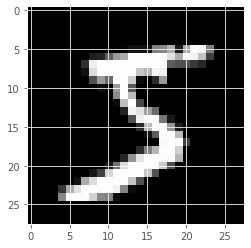

In [53]:
from matplotlib import pyplot
import numpy as np

pyplot.imshow(x_train[0].reshape((28, 28)), cmap="gray")
print(x_train.shape)

## 784是mnist数据集每个样本的像素点个数

<img src="./img/4.png" alt="FAO" width="790">

<img src="./img/5.png" alt="FAO" width="790">

In [54]:
y_train[0]

5

In [55]:
import tensorflow as tf
from tensorflow.keras import layers

In [56]:
model = tf.keras.Sequential()
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
# 10,这是图片是属于0-9哪个分类
model.add(layers.Dense(10, activation='softmax'))

选择损失和评估函数时候需要选择合适的,Api参考：https://tensorflow.google.cn/api_docs/python/tf/keras/metrics/SparseCategoricalAccuracy?version=stable

## 一定选择合适的损失函数

In [57]:
model.compile(optimizer=tf.keras.optimizers.Adam(0.005),
             loss=tf.keras.losses.SparseCategoricalCrossentropy(),
             metrics=[tf.keras.metrics.SparseCategoricalAccuracy()])

In [58]:
model.fit(x_train, y_train, epochs=5, batch_size=64,
          validation_data=(x_valid, y_valid))

Epoch 1/5
782/782 [==============================] - 1s 916us/step - loss: 0.3099 - sparse_categorical_accuracy: 0.9084 - val_loss: 0.1991 - val_sparse_categorical_accuracy: 0.9395
Epoch 2/5
782/782 [==============================] - 1s 744us/step - loss: 0.1695 - sparse_categorical_accuracy: 0.9496 - val_loss: 0.1629 - val_sparse_categorical_accuracy: 0.9500
Epoch 3/5
782/782 [==============================] - 1s 750us/step - loss: 0.1349 - sparse_categorical_accuracy: 0.9591 - val_loss: 0.1255 - val_sparse_categorical_accuracy: 0.9633
Epoch 4/5
782/782 [==============================] - 1s 769us/step - loss: 0.1183 - sparse_categorical_accuracy: 0.9641 - val_loss: 0.1312 - val_sparse_categorical_accuracy: 0.9624
Epoch 5/5
782/782 [==============================] - 1s 747us/step - loss: 0.1044 - sparse_categorical_accuracy: 0.9686 - val_loss: 0.1305 - val_sparse_categorical_accuracy: 0.9630


# tf.data模块常用函数

In [59]:
import numpy as np
input_data = np.arange(16)
input_data

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])

In [60]:
dataset = tf.data.Dataset.from_tensor_slices(input_data)
for data in dataset:
    print (data)

tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(3, shape=(), dtype=int32)
tf.Tensor(4, shape=(), dtype=int32)
tf.Tensor(5, shape=(), dtype=int32)
tf.Tensor(6, shape=(), dtype=int32)
tf.Tensor(7, shape=(), dtype=int32)
tf.Tensor(8, shape=(), dtype=int32)
tf.Tensor(9, shape=(), dtype=int32)
tf.Tensor(10, shape=(), dtype=int32)
tf.Tensor(11, shape=(), dtype=int32)
tf.Tensor(12, shape=(), dtype=int32)
tf.Tensor(13, shape=(), dtype=int32)
tf.Tensor(14, shape=(), dtype=int32)
tf.Tensor(15, shape=(), dtype=int32)


## repeat操作

In [61]:
dataset = tf.data.Dataset.from_tensor_slices(input_data)
dataset = dataset.repeat(2)
for data in dataset:
    print (data)

tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(3, shape=(), dtype=int32)
tf.Tensor(4, shape=(), dtype=int32)
tf.Tensor(5, shape=(), dtype=int32)
tf.Tensor(6, shape=(), dtype=int32)
tf.Tensor(7, shape=(), dtype=int32)
tf.Tensor(8, shape=(), dtype=int32)
tf.Tensor(9, shape=(), dtype=int32)
tf.Tensor(10, shape=(), dtype=int32)
tf.Tensor(11, shape=(), dtype=int32)
tf.Tensor(12, shape=(), dtype=int32)
tf.Tensor(13, shape=(), dtype=int32)
tf.Tensor(14, shape=(), dtype=int32)
tf.Tensor(15, shape=(), dtype=int32)
tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(3, shape=(), dtype=int32)
tf.Tensor(4, shape=(), dtype=int32)
tf.Tensor(5, shape=(), dtype=int32)
tf.Tensor(6, shape=(), dtype=int32)
tf.Tensor(7, shape=(), dtype=int32)
tf.Tensor(8, shape=(), dtype=int32)
tf.Tensor(9, shape=(), dtype=int32)
tf.Tensor(10, shape=(), dtype=int32)
tf.Tensor(11, shape=(

## batch操作

In [62]:
dataset = tf.data.Dataset.from_tensor_slices(input_data)
dataset = dataset.repeat(2).batch(4)
for data in dataset:
    print (data)

tf.Tensor([0 1 2 3], shape=(4,), dtype=int32)
tf.Tensor([4 5 6 7], shape=(4,), dtype=int32)
tf.Tensor([ 8  9 10 11], shape=(4,), dtype=int32)
tf.Tensor([12 13 14 15], shape=(4,), dtype=int32)
tf.Tensor([0 1 2 3], shape=(4,), dtype=int32)
tf.Tensor([4 5 6 7], shape=(4,), dtype=int32)
tf.Tensor([ 8  9 10 11], shape=(4,), dtype=int32)
tf.Tensor([12 13 14 15], shape=(4,), dtype=int32)


## shuffle操作

In [63]:
dataset = tf.data.Dataset.from_tensor_slices(input_data).shuffle(buffer_size=10).batch(4)
for data in dataset:
    print (data)

tf.Tensor([ 4 10  1  3], shape=(4,), dtype=int32)
tf.Tensor([ 8  5 12  0], shape=(4,), dtype=int32)
tf.Tensor([ 9  6  2 11], shape=(4,), dtype=int32)
tf.Tensor([13 15 14  7], shape=(4,), dtype=int32)


## 重新训练

In [64]:
train = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train = train.batch(32)
train = train.repeat()

valid = tf.data.Dataset.from_tensor_slices((x_valid, y_valid))
valid = valid.batch(32)
valid = valid.repeat()

model.fit(train, epochs=5,steps_per_epoch=100, validation_data=valid,validation_steps=100)

Epoch 1/5
100/100 [==============================] - 0s 1ms/step - loss: 0.1074 - sparse_categorical_accuracy: 0.9656 - val_loss: 0.2339 - val_sparse_categorical_accuracy: 0.9372
Epoch 2/5
100/100 [==============================] - 0s 1ms/step - loss: 0.1328 - sparse_categorical_accuracy: 0.9597 - val_loss: 0.1766 - val_sparse_categorical_accuracy: 0.9509
Epoch 3/5
100/100 [==============================] - 0s 1ms/step - loss: 0.1721 - sparse_categorical_accuracy: 0.9500 - val_loss: 0.1987 - val_sparse_categorical_accuracy: 0.9434
Epoch 4/5
100/100 [==============================] - 0s 1ms/step - loss: 0.1639 - sparse_categorical_accuracy: 0.9497 - val_loss: 0.3103 - val_sparse_categorical_accuracy: 0.9128
Epoch 5/5
100/100 [==============================] - 0s 1ms/step - loss: 0.1758 - sparse_categorical_accuracy: 0.9453 - val_loss: 0.2178 - val_sparse_categorical_accuracy: 0.9372


# 练手的fashion数据集

In [65]:
from tensorflow import keras
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

## 衣服分类

![](./img/6.png)

In [66]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [67]:
train_images.shape

(60000, 28, 28)

In [68]:
len(train_labels)

60000

In [69]:
test_images.shape

(10000, 28, 28)

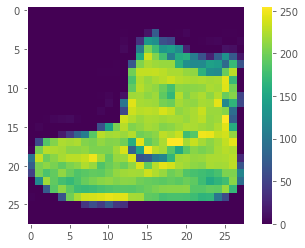

In [70]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [71]:
train_images = train_images / 255.0

test_images = test_images / 255.0

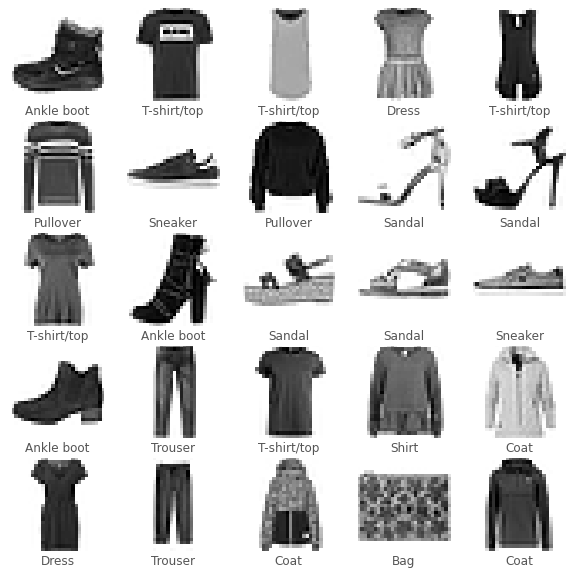

In [72]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [73]:
model = keras.Sequential([
    # 把数据拉长，784的向量
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    # 输出10个分类
    keras.layers.Dense(10, activation='softmax')
])

In [74]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [75]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 1s 668us/step - loss: 0.4960 - accuracy: 0.8254
Epoch 2/10
1875/1875 [==============================] - 1s 646us/step - loss: 0.3763 - accuracy: 0.8635
Epoch 3/10
1875/1875 [==============================] - 1s 667us/step - loss: 0.3358 - accuracy: 0.8783
Epoch 4/10
1875/1875 [==============================] - 1s 674us/step - loss: 0.3127 - accuracy: 0.8847
Epoch 5/10
1875/1875 [==============================] - 2s 898us/step - loss: 0.2937 - accuracy: 0.8917
Epoch 6/10
1875/1875 [==============================] - 2s 934us/step - loss: 0.2781 - accuracy: 0.8967
Epoch 7/10
1875/1875 [==============================] - 2s 932us/step - loss: 0.2673 - accuracy: 0.9003
Epoch 8/10
1875/1875 [==============================] - 2s 927us/step - loss: 0.2555 - accuracy: 0.9051
Epoch 9/10
1875/1875 [==============================] - 2s 925us/step - loss: 0.2467 - accuracy: 0.9075
Epoch 10/10
1875/1875 [==============================] - 2s 922u

## 评估操作

In [76]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.3513 - accuracy: 0.8781

Test accuracy: 0.8780999779701233


In [77]:
predictions = model.predict(test_images)

In [78]:
predictions.shape

(10000, 10)

In [79]:
predictions[0]

array([7.7473150e-10, 6.3833839e-15, 3.8372660e-12, 2.0003302e-13,
       2.1375655e-12, 3.1530890e-03, 1.0153586e-10, 5.8285277e-03,
       2.6759008e-09, 9.9101841e-01], dtype=float32)

In [80]:
np.argmax(predictions[0])

9

In [81]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array, true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array, true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

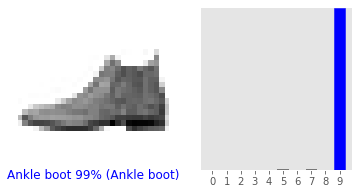

In [82]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

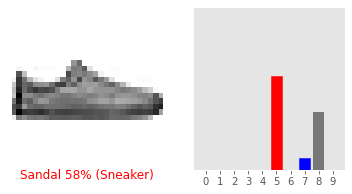

In [83]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

## 保存训练好的模型

### 保存权重参数与网络模型

In [84]:
model.save('fashion_model.h5')

### 加载模型

In [85]:
new_model = tf.keras.models.load_model('fashion_model.h5')
new_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_9 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


### 网络架构

In [86]:
config = model.to_json()
config

'{"class_name": "Sequential", "config": {"name": "sequential_3", "layers": [{"class_name": "InputLayer", "config": {"batch_input_shape": [null, 28, 28], "dtype": "float32", "sparse": false, "ragged": false, "name": "flatten_1_input"}}, {"class_name": "Flatten", "config": {"name": "flatten_1", "trainable": true, "batch_input_shape": [null, 28, 28], "dtype": "float32", "data_format": "channels_last"}}, {"class_name": "Dense", "config": {"name": "dense_8", "trainable": true, "dtype": "float32", "units": 128, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}}, {"class_name": "Dense", "config": {"name": "dense_9", "trainable": true, "dtype": "float32", "units": 10, "activation": "softmax", "use_bias": true, "kernel_initializer": 

In [87]:
with open('config.json', 'w') as json:
    json.write(config)

In [88]:
model = keras.models.model_from_json(config)
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_9 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


### 权重参数

In [89]:
weights = model.get_weights()
weights

[array([[-0.03386981, -0.04174538,  0.02974585, ..., -0.05048818,
         -0.05132222,  0.02739967],
        [ 0.06848101, -0.05374009,  0.00379228, ..., -0.00296623,
          0.03719546,  0.03180804],
        [-0.03492476,  0.02349371, -0.02262044, ..., -0.02772045,
          0.05454846, -0.03332594],
        ...,
        [-0.06504022, -0.02837474,  0.02943699, ..., -0.05081403,
         -0.01053876, -0.08067701],
        [-0.04621767, -0.02706236, -0.06037234, ...,  0.04459865,
         -0.05766464, -0.03277078],
        [-0.07057482, -0.00105597, -0.0159586 , ...,  0.02050651,
         -0.01576441, -0.01487479]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

In [90]:
model.save_weights('weights.h5')